<a href="https://colab.research.google.com/github/Sonal-Sukanya/Porp-Perm/blob/main/Poro_Perm_Crossplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [5]:
import zipfile
import io

In [6]:
with zipfile.ZipFile(io.BytesIO(uploaded['archive.zip']), 'r') as z:
    z.extractall("archive")

In [7]:
import os
os.listdir("archive")

['A16',
 'B8',
 'A15',
 'C2',
 'C5.dev',
 'B2',
 'C4.dev',
 'A16.dev',
 'A10',
 'B4.dev',
 'C4',
 'C1',
 'C3',
 'B8.dev',
 'Wellheader',
 'C7.dev',
 'C6.dev',
 'C1.dev',
 'B9',
 'A10.dev',
 'B1.dev',
 'B4',
 'B9.dev',
 'A15.dev',
 'C5',
 'C2.dev',
 'C3.dev',
 'B2.dev']

In [9]:
!pip install lasio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 505.2 kB/s eta 0:00:00


In [10]:
import lasio

In [21]:
las = lasio.read("archive/C5")

In [25]:
df = las.df()
df = df.reset_index()
print(df.head())

        DEPT      GAMMA      PERM  POROSITY  RESISTIVITY  LITH
0  1803.6009        NaN       NaN       NaN          NaN   NaN
1  1804.1009  68.755798  0.001705  0.002250     1.944252   3.0
2  1804.6009  66.499458  0.001380  0.002125     1.443765   2.0
3  1805.1009  64.866669  0.001082  0.002138     0.874955   2.0
4  1805.6009  65.701607  0.000887  0.002269     0.516267   3.0


In [22]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1065 entries, 1804.1009 to 2336.1009
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GAMMA        1065 non-null   float64
 1   PERM         1065 non-null   float64
 2   POROSITY     1065 non-null   float64
 3   RESISTIVITY  1065 non-null   float64
 4   LITH         1065 non-null   float64
dtypes: float64(5)
memory usage: 49.9 KB


In [27]:
df['POROSITY'] = df['POROSITY'] * 100

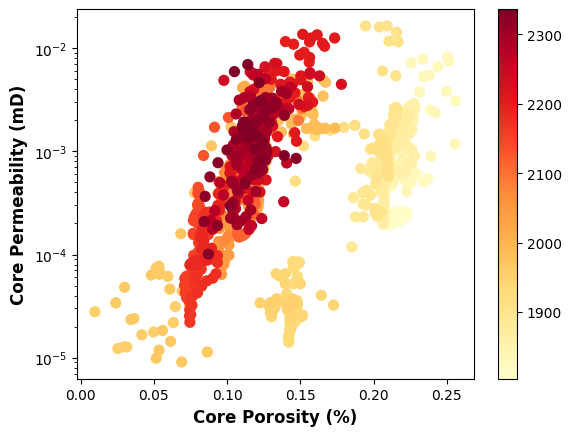

In [28]:
p = plt.scatter(x=df['POROSITY'], y=df['PERM'], c=df['DEPT'], cmap='YlOrRd', s=50)
plt.semilogy()
plt.ylabel('Core Permeability (mD)', fontsize=12, fontweight='bold')
plt.xlabel('Core Porosity (%)', fontsize=12, fontweight='bold');
plt.colorbar(p)